# `Forecasting Taxi Trip Demand in New York City`

> * Problem Statement:

  > The goal of this project is to forecast the number of taxi trips requested during each hour in a week in New York City, utilizing historical data about taxi trips in the city.

> * Data:

  > We will utilize hourly taxi trip data from the year 2018 to develop our forecasting model. This historical dataset provides valuable insights into the patterns and trends of taxi trip demand in New York City. Our model will be designed to predict taxi trip demand for the year 2019.

> * Components:

  > To achieve this goal, we will:

  > * Prepare and analyze the 2018 hourly taxi trip data.

  > * Evaluate the stationarity of the dataset using the Augmented Dickey-Fuller (ADF) test, ensuring that the data is suitable for time series analysis.
  > * Implement an AutoRegressive Integrated Moving Average (ARIMA) model, a powerful time series forecasting method, to make hourly trip demand predictions.
  > * Evaluate the ARIMA model's performance using the AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF) to identify the appropriate order for AR, MA, or seasonal components.
  > * Fit the ARIMA model to the 2018 data, considering seasonality and trends.
  > * Evaluate the model's performance in forecasting taxi trip demand for the year 2019 using true data.

> Through this project, we aim to develop a robust forecasting solution for taxi trip demand, which can have practical applications in managing taxi services efficiently in New York City.






In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import plotly.express as px
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

In [2]:
# Reading the CSV data file from the given URL and converting the 'Timestamp' column to datetime
data = pd.read_csv("https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/Assignment2/assignment2.csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Creating a line plot using Plotly Express
fig = px.line(data, x="Timestamp", y='trips')
#fig.write_html('figure.html')
fig.update_layout(title="Hourly Taxi Trips in New York City (2018)")

fig

In [3]:
# Displaying the first few rows of the loaded dataset to inspect its structure
data.head()

,Timestamp,year,month,day,hour,trips
0,2018-01-01 00:00:00,2018,1,1,0,16714
1,2018-01-01 01:00:00,2018,1,1,1,19041
2,2018-01-01 02:00:00,2018,1,1,2,16590
3,2018-01-01 03:00:00,2018,1,1,3,12626
4,2018-01-01 04:00:00,2018,1,1,4,8739


In [4]:
# Checking and summing up missing values (NaN)
data.isnull().sum()

Timestamp    0
year         0
month        0
day          0
hour         0
trips        0
dtype: int64

In [5]:
# Testing for stationarity in our data using the Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller

# ADF test
result = adfuller(data["trips"])

# Printing the p-value from the ADF test
print(f'p-value: {result[1]}')

# If the p-value is less than 0.05, we reject the null hypothesis, indicating that our data is stationary.


p-value: 6.855268891312077e-17


In [6]:
# Importing the ARIMA model from statsmodels, fitting it to our data, and summarizing the model results
import statsmodels.api as sm
model = sm.tsa.ARIMA(data["trips"], order=(1, 0, 0))
modelFit= model.fit()
modelFit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  trips   No. Observations:                 8760
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -79847.068
Date:                Wed, 13 Sep 2023   AIC                         159700.136
Time:                        22:41:17   BIC                         159721.370
Sample:                             0   HQIC                        159707.372
                               - 8760                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.174e+04    300.621     39.038      0.000    1.11e+04    1.23e+04
ar.L1          0.9197      0.005    185.016      0.000       0.910       0.929
sigma2      4.837e+06   6.71e+04     72.108      0.000    4.71e+06    4.97e+06
===================================================================================
Ljung-Box (L1) (Q):                3569.90   Jarque-Bera (JB):               284.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Figure size 1200x400 with 0 Axes>

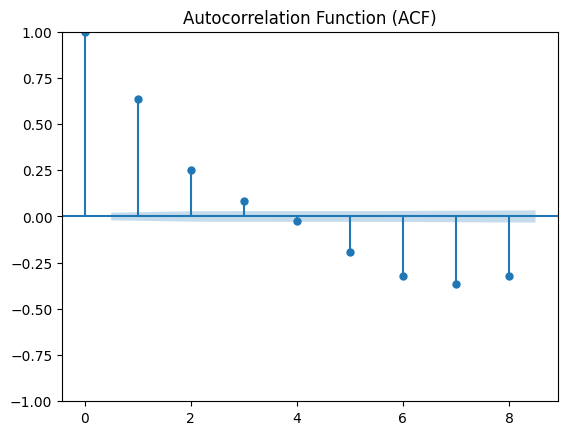

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
# Plot ACF
res = modelFit.resid
plt.figure(figsize=(12, 4))
plot_acf(res, lags=8)  # Adjust 'lags' as needed
plt.title("Autocorrelation Function (ACF)")
plt.show()

<Figure size 1200x400 with 0 Axes>

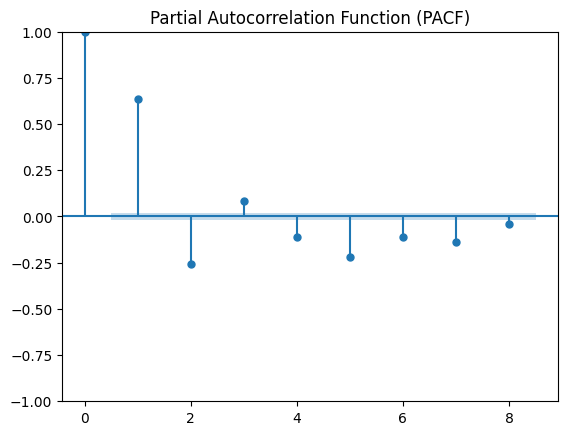

In [8]:
# Plot PACF
plt.figure(figsize=(12, 4))
plot_pacf(res, lags=8)  # Adjust 'lags' as needed
plt.title("Partial Autocorrelation Function (PACF)")
plt.show()

>Since the ACF dies out gradually, and the PACF cuts off shortly after a few lags, we will change the AR argument to "2" and add a seasonality argument to reevaluate the model's performance

In [9]:
# Fit an ARIMA model to the data with a seasonal component
model = sm.tsa.ARIMA(data["trips"], order=(2, 0, 0), seasonal_order=(1, 0, 1, 24))
modelFit = model.fit()
modelFit.summary

<bound method SARIMAXResults.summary of <statsmodels.tsa.arima.model.ARIMAResults object at 0x7f2195d439a0>>

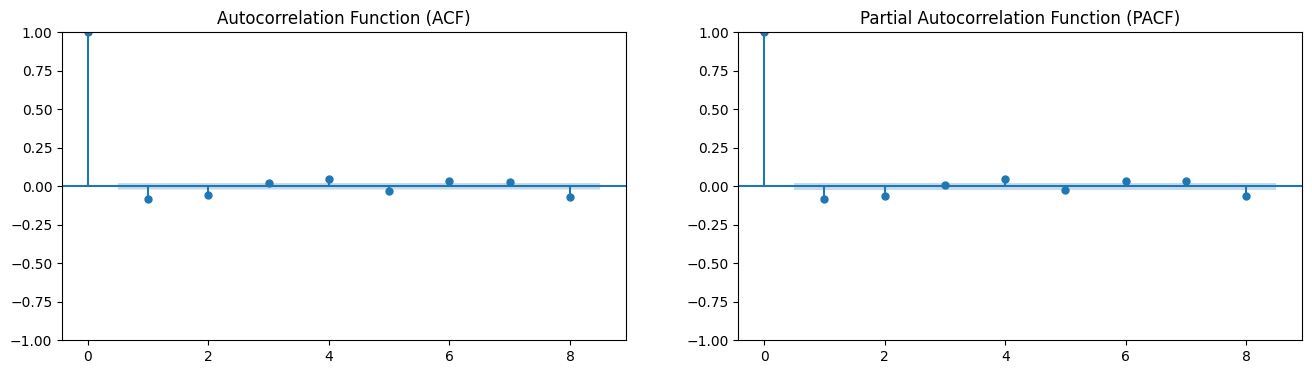

In [10]:
# Create subplots to display ACF and PACF side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
res = modelFit.resid
# Plot ACF on the left subplot
plot_acf(res, lags=8, ax=ax1)
ax1.set_title("Autocorrelation Function (ACF)")

# Plot PACF on the right subplot
plot_pacf(res, lags=8, ax=ax2)
ax2.set_title("Partial Autocorrelation Function (PACF)")

# Reevaluating the model by examining ACF and PACF
plt.show()

> ### Evaluation of ACF and PACF

After analyzing the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots, we observe that:

- The ACF values for most lags are close to zero.
- The PACF values also indicate a rapid decrease after a few lags.

These observations suggest that our time series data may not require higher-order Autoregressive (AR) or Moving Average (MA) terms. It implies that the current ARIMA model with parameters (2, 0, 0) and seasonal order (1, 0, 1, 24) is performing well in capturing the temporal dependencies within the data.

##We will proceed with this model for forecasting and evaluation.


In [11]:
 # reading data for Forecasting and for testing

from google.colab import drive
drive.mount('/content/drive')

V_data = pd.read_csv("https://github.com/dustywhite7/Econ8310/raw/master/AssignmentData/Assignment2/assignment2test.csv")
url = 'https://drive.google.com/uc?id={}'.format('1KL8L6_8F3r5yyRHU91-d_GLqcuEOYd5L')
dataTest = pd.read_csv(url)["trips"]
V_data.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Timestamp,year,month,day,hour
0,2019-01-01 00:00:00,2019,1,1,0
1,2019-01-01 01:00:00,2019,1,1,1
2,2019-01-01 02:00:00,2019,1,1,2
3,2019-01-01 03:00:00,2019,1,1,3
4,2019-01-01 04:00:00,2019,1,1,4


In [12]:
# Forecasting new values and evaluating our forecast using true value
pred=modelFit.forecast(steps=len(V_data))
pred = pred.reset_index(drop=True)
rmse = sum([(np.squeeze(pred)[i]-dataTest[i])**2 for i in range(len(np.squeeze(pred)))])
rmse = np.sqrt(rmse)*1/744
rmse

106.23821776014245

In [13]:
dataTest = pd.read_csv(url)
dataTest["Prediction"] = pred


# Plot true values ("trips") and predictions on the same plot
fig = px.line(dataTest, x="Timestamp", y=["trips", "Prediction"])
fig.update_layout(title="True Values vs. Predictions", xaxis_title="Timestamp", yaxis_title="Trips")
fig.show()